In [48]:
import pandas as pd
SG_Dataset = pd.read_excel('EnvNP_SG_Facebook.xlsx')
SG_Dataset

Unnamed: 0            Name of organisation  \
0              0  Nature Society Singapore (NSS)   
1              0  Nature Society Singapore (NSS)   
2              0  Nature Society Singapore (NSS)   
3              0  Nature Society Singapore (NSS)   
4              0  Nature Society Singapore (NSS)   
...          ...                             ...   
1801          41                   Earthlink NTU   
1802          41                   Earthlink NTU   
1803          41                   Earthlink NTU   
1804          41                   Earthlink NTU   
1805          41                   Earthlink NTU   

                            Description of organisation  \
0     The Nature Society (Singapore) or NSS is a non...   
1     The Nature Society (Singapore) or NSS is a non...   
2     The Nature Society (Singapore) or NSS is a non...   
3     The Nature Society (Singapore) or NSS is a non...   
4     The Nature Society (Singapore) or NSS is a non...   
...                                                 ...   
1801  Since 1993, Earthlink has led NTU’s environmen...   
1802  Since 1993, Earthlink has led NTU’s environmen...   
1803  Since 1993, Earthlink has led NTU’s environmen...   
1804  Since 1993, Earthlink has led NTU’s environmen...   
1805  Since 1993, Earthlink has led NTU’s environmen...   

                           Mission/ Objectives/ Purpose  \
0     - Organise nature appreciation activities like...   
1     - Organise nature appreciation activities like...   
2     - Organise nature appreciation activities like...   
3     - Organise nature appreciation activities like...   
4     - Organise nature appreciation activities like...   
...                                                 ...   
1801            Raise awareness of environmental issues   
1802            Raise awareness of environmental issues   
1803            Raise awareness of environmental issues   
1804            Raise awareness of environmental issues   
1805            Raise awareness of environmental issues   

                                   Programmes/ projects  \
0     - guided nature walks, bird and butterfly watc...   
1     - guided nature walks, bird and butterfly watc...   
2     - guided nature walks, bird and butterfly watc...   
3     - guided nature walks, bird and butterfly watc...   
4     - guided nature walks, bird and butterfly watc...   
...                                                 ...   
1801  - Guided tours\n- NTU Biodiversity Week\n- NTr...   
1802  - Guided tours\n- NTU Biodiversity Week\n- NTr...   
1803  - Guided tours\n- NTU Biodiversity Week\n- NTr...   
1804  - Guided tours\n- NTU Biodiversity Week\n- NTr...   
1805  - Guided tours\n- NTU Biodiversity Week\n- NTr...   

                                        Funding sources  \
0     Run by volunteers, the Society depends financi...   
1     Run by volunteers, the Society depends financi...   
2     Run by volunteers, the Society depends financi...   
3     Run by volunteers, the Society depends financi...   
4     Run by volunteers, the Society depends financi...   
...                                                 ...   
1801                                                NaN   
1802                                                NaN   
1803                                                NaN   
1804                                                NaN   
1805                                                NaN   

     Collaboration with government / businesses Choice of Climate action  \
0                             Yes -  businesses     Advocacy/ Mitigation   
1                             Yes -  businesses     Advocacy/ Mitigation   
2                             Yes -  businesses     Advocacy/ Mitigation   
3                             Yes -  businesses     Advocacy/ Mitigation   
4                             Yes -  businesses     Advocacy/ Mitigation   
...                                         ...                      ...   
1801         

In [54]:
SG_Dataset.dropna(subset=['Content'], inplace=True)
df = SG_Dataset[['Facebook_User','Content']]
df.head(10)

Facebook_User                                            Content
0  naturesocietysingapore  Dr Chan Kin Onn, the former curator of herpeto...
1  naturesocietysingapore  wildlife photography tips from Jayaprakash Boj...
2  naturesocietysingapore  flashback:a talk on the predecessor of Nature ...
3  naturesocietysingapore       more on the Woodlands Checkpoint expansion …
4  naturesocietysingapore  a good perspective of a whole body of a fungi ...
5  naturesocietysingapore  it's the International Day of Forests ..painti...
6  naturesocietysingapore  Call for Volunteers!!!Have an interest in natu...
7  naturesocietysingapore                            it's World Frog Day ...
8  naturesocietysingapore  All of these will provide insights into how th...
9  naturesocietysingapore  an aerial perspective of the planned reclamati...

In [38]:
!pip3 install pandas nltk gensim


In [56]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your DataFrame (example)
# df = pd.read_csv('your_dataframe.csv')

# Define the preprocessing function
def preprocess_text(text):
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove special characters and numbers
    tokens = [re.sub(r'[^a-zA-Z\s]', '', token) for token in tokens]
    
    # Initialize the lemmatizer and stopwords list
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Lemmatize and remove stopwords and tokens that became empty after cleaning
    clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token != '']
    
    return " ".join(clean_tokens)

# Apply preprocessing to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(preprocess_text)

# Display the first few rows of the dataframe to verify changes
display(df.head())


[nltk_data] Downloading package punkt to /Users/yuvvvvv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuvvvvv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yuvvvvv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/k4/5t9w_3t17bx_h1kzys3r8tvh0000gn/T/ipykernel_70325/2344602363.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Content'] = df['Content'].apply(preprocess_text)


Facebook_User                                            Content  \
0  naturesocietysingapore  Dr Chan Kin Onn, the former curator of herpeto...   
1  naturesocietysingapore  wildlife photography tips from Jayaprakash Boj...   
2  naturesocietysingapore  flashback:a talk on the predecessor of Nature ...   
3  naturesocietysingapore       more on the Woodlands Checkpoint expansion …   
4  naturesocietysingapore  a good perspective of a whole body of a fungi ...   

                                     Cleaned_Content  
0  dr chan kin onn former curator herpetology stu...  
1  wildlife photography tip jayaprakash bojan jay...  
2  flashback talk predecessor nature society sing...  
3                      woodland checkpoint expansion  
4                  good perspective whole body fungi

In [40]:
#dictionary creation: mapping each word to a unique id
import gensim
dictionary = gensim.corpora.Dictionary(df['Cleaned_Content'].apply(str.split))
count = 0
for k, v in dictionary.iteritems():
    print(k, v)

#13,126 unique words: goal is to identify environmental problems and solutions being worked on.


0 amphibian
1 animal
2 anotherhttps
3 bioacoustics
4 biologist
5 chan
6 chian
7 curator
8 differentiate
9 dr
10 former
11 herpetology
12 history
13 howlisteningto
14 important
15 kin
16 kong
17 lee
18 museum
19 natural
20 one
21 onn
22 reptile
23 said
24 sound
25 specie
26 study
27 tool
28 wwwstraitstimescom
29 bojan
30 contributor
31 fb
32 jayaprakash
33 n
34 photography
35 regular
36 tip
37 wildlife
38 flashback
39 nature
40 predecessor
41 singapore
42 society
43 talk
44 checkpoint
45 expansion
46 woodland
47 body
48 fungi
49 good
50 perspective
51 whole
52 among
53 another
54 beautiful
55 cameron
56 character
57 consists
58 conspicuous
59 creeper
60 crowded
61 day
62 description
63 drop
64 elbow
65 extraordinary
66 feature
67 forest
68 found
69 give
70 greater
71 international
72 jungle
73 larger
74 literally
75 luxuriance
76 manner
77 mass
78 much
79 network
80 numerous
81 orchidaceous
82 painting
83 parasiteschief
84 part
85 peculiar
86 pitcherplants
87 plant
88 possession
89 prim

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['Cleaned_Content'].apply(str.split)]


In [21]:
bow_doc_4310 = bow_corpus[100] #
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],
                                               dictionary[bow_doc_4310[i][0]],
bow_doc_4310[i][1]))

Word 41 ("singapore") appears 3 time.
Word 84 ("part") appears 1 time.
Word 95 ("together") appears 1 time.
Word 274 ("crucial") appears 1 time.
Word 311 ("future") appears 1 time.
Word 328 ("let") appears 1 time.
Word 397 ("green") appears 2 time.
Word 420 ("back") appears 1 time.
Word 438 ("sg") appears 1 time.
Word 462 ("save") appears 1 time.
Word 468 ("today") appears 1 time.
Word 512 ("plan") appears 2 time.
Word 682 ("know") appears 1 time.
Word 833 ("delve") appears 1 time.
Word 837 ("recycling") appears 1 time.
Word 863 ("greener") appears 1 time.
Word 865 ("initiative") appears 1 time.
Word 869 ("sustainable") appears 1 time.
Word 1086 ("work") appears 1 time.
Word 1189 ("promoting") appears 1 time.
Word 1201 ("welcome") appears 1 time.
Word 1313 ("food") appears 5 time.
Word 1426 ("step") appears 1 time.
Word 1476 ("foster") appears 1 time.
Word 1482 ("resource") appears 1 time.
Word 1553 ("create") appears 1 time.
Word 1583 ("habit") appears 1 time.
Word 1603 ("waste") appe

In [24]:
import gensim
from gensim.models import CoherenceModel
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk.stem as stemmer
np.random.seed(2018)
import pandas as pd
import numpy as np
import re
import gensim
from gensim.utils import simple_preprocess
import nltk
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes = 10, iterations = 100)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

[<gensim.models.ldamodel.LdaModel object at 0x28d902310>, <gensim.models.ldamodel.LdaModel object at 0x28d7ae4d0>, <gensim.models.ldamodel.LdaModel object at 0x28c100290>, <gensim.models.ldamodel.LdaModel object at 0x28d74ff50>, <gensim.models.ldamodel.LdaModel object at 0x287d072d0>, <gensim.models.ldamodel.LdaModel object at 0x28baf7a50>, <gensim.models.ldamodel.LdaModel object at 0x28d7a7150>, <gensim.models.ldamodel.LdaModel object at 0x287744490>, <gensim.models.ldamodel.LdaModel object at 0x28bae5e90>, <gensim.models.ldamodel.LdaModel object at 0x28a87c150>, <gensim.models.ldamodel.LdaModel object at 0x287d96d90>, <gensim.models.ldamodel.LdaModel object at 0x28d367650>, <gensim.models.ldamodel.LdaModel object at 0x28cfa0d90>, <gensim.models.ldamodel.LdaModel object at 0x28d3d83d0>, <gensim.models.ldamodel.LdaModel object at 0x28c05e2d0>, <gensim.models.ldamodel.LdaModel object at 0x107d86990>, <gensim.models.ldamodel.LdaModel object at 0x28d3b2050>, <gensim.models.ldamodel.LdaMod

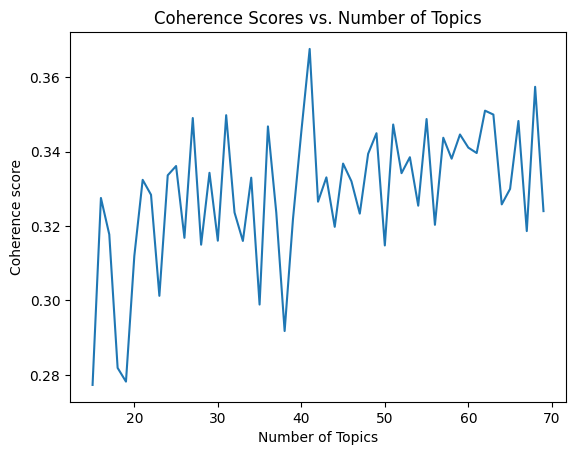

Optimal number of topics: 41


In [29]:
start_topics = 15
limit_topics = 70 #experiment with these factors to attain the highest coherence scores
step_size = 1
num_topics = list(range(start_topics,limit_topics + 1, step_size))

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=df['Cleaned_Content'].apply(str.split), start=start_topics, limit=limit_topics, step=step_size)

print(model_list)
print(coherence_values)
# Plotting coherence values
x = range(start_topics, limit_topics, step_size)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Scores vs. Number of Topics")
plt.show()
optimal_num_topics = num_topics[coherence_values.index(max(coherence_values))]
print(f"Optimal number of topics: {optimal_num_topics}")

In [30]:
import random
total_avail_topics = len(dictionary)
lda_model_total =  gensim.models.LdaMulticore(bow_corpus, num_topics=total_avail_topics, id2word=dictionary, passes=10, workers=4)
total_topics = lda_model_total.show_topics(formatted=False, num_topics=total_avail_topics)


/opt/homebrew/lib/python3.11/site-packages/gensim/models/ldamodel.py:850: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


In [60]:
df = df.sort_values(by=['Facebook_User'])
df = df.reset_index(drop=True)
df

Facebook_User                                            Content  \
0        ACRESasia  CROAKSTAR GETS A SECOND CHANCE IN THE WILD: At...   
1        ACRESasia  CNY OPEN HOUSE: CELEBRATE WITH ACRES!As the ma...   
2        ACRESasia  DRAGONS OF ACRES Happy 4th day of the Chinese ...   
3        ACRESasia  LOVE IS EVERYWHERE - in the air, sometimes on ...   
4        ACRESasia  RESERVE 18 MAY 2024 FOR ACRES GALA: WILD SECON...   
...            ...                                                ...   
1713   zerowastesg   Navigate a Sustainable Lunar New Year: Logist...   
1714   zerowastesg   Embracing Responsibility this Chinese New Yea...   
1715   zerowastesg  This is Part 2 of our Spring Cleaning Sustaina...   
1716   zerowastesg   Munch Mindfully this Chinese New Year: Sustai...   
1717   zerowastesg  Let's kickstart a waste-free New Year together...   

                                        Cleaned_Content  
0     croakstar get second chance wild wildlife resc...  
1     cny open house celebrate acre majestic dragon ...  
2     dragon acre happy th day chinese new year cele...  
3     love everywhere air sometimes ground rain sun ...  
4     reserve may acre gala wild second chance meet ...  
...                                                 ...  
1713  navigate sustainable lunar new year logistics ...  
1714  embracing responsibility chinese new year exte...  
1715  part spring cleaning sustainability guide decl...  
1716  munch mindfully chinese new year sustainable s...  
1717  let kickstart wastefree new year together mont...  

[1718 rows x 3 columns]

In [146]:
#goal is to create a new dataframe where we get 41 topics per organisation

mapped_topics = {}
countries = ['Philippines', 'Thailand', 'Vietnam']

def generated_df(df_specific_bow_corpus, organisation_name):
    lda_model =  gensim.models.LdaMulticore(df_specific_bow_corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15, workers=4)
    topics = lda_model.show_topics(formatted=False, num_topics=optimal_num_topics)
    main_df = pd.DataFrame()
    for topic in topics:
        words = [word for word in topic[1]] 
        Topic_Word = [dictionary[topic[0]] for word, value in topic[1]]  
        word_values = [value for word, value in topic[1]] 
        topics_df = pd.DataFrame({'Topic': Topic_Word, 'Word': words, 'Value': word_values})
        topics_df['Organisation'] = organisation_name   
        main_df = pd.concat([main_df, topics_df])
    return main_df

def feed_dfs(df):
    main_df = pd.DataFrame()
    for organisation in list(df['Facebook_User'].unique()):
        unique_org_df = df[df['Facebook_User'] == organisation]
        df_specific_bow_corpus = [dictionary.doc2bow(doc) for doc in unique_org_df['Cleaned_Content'].apply(str.split)]
        generated_dataframe = generated_df(df_specific_bow_corpus, organisation)
        mapped_topics[organisation] = generated_dataframe
        main_df = pd.concat([main_df, generated_dataframe])
    return main_df



for country in countries:
    df_country = pd.read_excel(f"EnvNP_{country}_Facebook.xlsx")
    df_country.dropna(subset=['Content'], inplace=True)
    df_country = df_country[['Facebook_User','Content']]
    df_country['Cleaned_Content'] = df_country['Content'].apply(preprocess_text)
    country_specific_topic_dataset = feed_dfs(df_country)
    country_specific_topic_dataset['Country'] = country
    country_specific_topic_dataset.to_excel(f"{country}_Topic_Dataset.xlsx") #save the country specific topic datasets to excel files

print("Topic datasets created")
#filtering out values below a certain threshold and then calculating topic scores -> to mitigate impact of noise on topic importance selection

Topic datasets created


In [150]:
topic_dataset = pd.read_excel('SG_Topic_Dataset.xlsx')
topic_dataset

Unnamed: 0        Topic                                  Word     Value  \
0              0    amphibian               ('wetland', 0.04060612)  0.040606   
1              1    amphibian                 ('lake', 0.011397911)  0.011398   
2              2    amphibian               ('living', 0.009774795)  0.009775   
3              3    amphibian                ('human', 0.008153367)  0.008153   
4              4    amphibian           ('initiative', 0.008152855)  0.008153   
...          ...          ...                                   ...       ...   
5735           5  predecessor            ('posting', 7.6178854e-05)  0.000076   
5736           6  predecessor  ('mismatchedmatches', 7.6178854e-05)  0.000076   
5737           7  predecessor               ('skip', 7.6178854e-05)  0.000076   
5738           8  predecessor            ('refrain', 7.6178854e-05)  0.000076   
5739           9  predecessor      ('vegetarianism', 7.6178854e-05)  0.000076   

         Organisation      Country  
0             scpwinc  Philippines  
1             scpwinc  Philippines  
2             scpwinc  Philippines  
3             scpwinc  Philippines  
4             scpwinc  Philippines  
...               ...          ...  
5735  WWF.Philippines  Philippines  
5736  WWF.Philippines  Philippines  
5737  WWF.Philippines  Philippines  
5738  WWF.Philippines  Philippines  
5739  WWF.Philippines  Philippines  

[5740 rows x 6 columns]

In [151]:
#for each organisation and each topic i want to get the lower and upper quartiles
from pprint import pprint
def get_iq_for_topic_in_organisation(topic):
    topic_df = topic_dataset[topic_dataset['Topic'] == topic]
    topic_values = [value for value in topic_df['Value']]
    lower_quartile = np.percentile(topic_values, 25)
    upper_quartile = np.percentile(topic_values, 75)
    return lower_quartile, upper_quartile

def get_iq_for_all_topics_in_organisation(topic_data):
    topics = list(topic_data['Topic'].unique())
    topic_iq = {}
    for topic in topics:
        lower_quartile, upper_quartile = get_iq_for_topic_in_organisation(topic)
        topic_iq[topic] = (lower_quartile, upper_quartile)
    return topic_iq

topic_iqs = get_iq_for_all_topics_in_organisation(topic_dataset)
pprint(topic_iqs)




{'amphibian': (7.630222353327554e-05, 0.003348893253132701),
 'animal': (7.617885421495885e-05, 0.0030444069998338814),
 'anotherhttps': (7.617885421495885e-05, 0.004952222225256264),
 'bioacoustics': (7.794742305122782e-05, 0.005497290985658765),
 'biologist': (7.694842497585341e-05, 0.005094650899991393),
 'bojan': (7.618471136083826e-05, 0.006541469367220998),
 'chan': (7.691118844377343e-05, 0.004966142470948398),
 'chian': (7.617885421495885e-05, 0.003290214808657765),
 'contributor': (8.280437396024354e-05, 0.005423222901299596),
 'curator': (7.73377287259791e-05, 0.004756810609251261),
 'differentiate': (7.844607171136886e-05, 0.0048743123188614845),
 'dr': (7.721614019828849e-05, 0.005604295292869209),
 'fb': (7.697656656091567e-05, 0.0030379649251699448),
 'flashback': (7.629349238413852e-05, 0.005007888888940215),
 'former': (7.665258272027131e-05, 0.003093017963692546),
 'herpetology': (7.66038938309066e-05, 0.005861416808329523),
 'history': (7.617885421495885e-05, 0.003002

In [152]:
# given the topic_iqs, how can i map it into my topic_dataset dataframe and create Q1 and Q3 columns
def map_iq_to_topic(topic_data, topic_iqs):
    topic_data['Q1'] = topic_data['Topic'].map(lambda x: topic_iqs[x][0])
    topic_data['Q3'] = topic_data['Topic'].map(lambda x: topic_iqs[x][1])
    return topic_data

topic_dataset = map_iq_to_topic(topic_dataset, topic_iqs)
topic_dataset

Unnamed: 0        Topic                                  Word     Value  \
0              0    amphibian               ('wetland', 0.04060612)  0.040606   
1              1    amphibian                 ('lake', 0.011397911)  0.011398   
2              2    amphibian               ('living', 0.009774795)  0.009775   
3              3    amphibian                ('human', 0.008153367)  0.008153   
4              4    amphibian           ('initiative', 0.008152855)  0.008153   
...          ...          ...                                   ...       ...   
5735           5  predecessor            ('posting', 7.6178854e-05)  0.000076   
5736           6  predecessor  ('mismatchedmatches', 7.6178854e-05)  0.000076   
5737           7  predecessor               ('skip', 7.6178854e-05)  0.000076   
5738           8  predecessor            ('refrain', 7.6178854e-05)  0.000076   
5739           9  predecessor      ('vegetarianism', 7.6178854e-05)  0.000076   

         Organisation      Country        Q1        Q3  
0             scpwinc  Philippines  0.000076  0.003349  
1             scpwinc  Philippines  0.000076  0.003349  
2             scpwinc  Philippines  0.000076  0.003349  
3             scpwinc  Philippines  0.000076  0.003349  
4             scpwinc  Philippines  0.000076  0.003349  
...               ...          ...       ...       ...  
5735  WWF.Philippines  Philippines  0.000077  0.004637  
5736  WWF.Philippines  Philippines  0.000077  0.004637  
5737  WWF.Philippines  Philippines  0.000077  0.004637  
5738  WWF.Philippines  Philippines  0.000077  0.004637  
5739  WWF.Philippines  Philippines  0.000077  0.004637  

[5740 rows x 8 columns]

In [153]:
import ast

topic_dataset['Filtered_Values'] = topic_dataset.apply(lambda row: row['Value'] if (row['Value'] >= row['Q1']) else np.NaN, axis=1)
topic_dataset

Unnamed: 0        Topic                                  Word     Value  \
0              0    amphibian               ('wetland', 0.04060612)  0.040606   
1              1    amphibian                 ('lake', 0.011397911)  0.011398   
2              2    amphibian               ('living', 0.009774795)  0.009775   
3              3    amphibian                ('human', 0.008153367)  0.008153   
4              4    amphibian           ('initiative', 0.008152855)  0.008153   
...          ...          ...                                   ...       ...   
5735           5  predecessor            ('posting', 7.6178854e-05)  0.000076   
5736           6  predecessor  ('mismatchedmatches', 7.6178854e-05)  0.000076   
5737           7  predecessor               ('skip', 7.6178854e-05)  0.000076   
5738           8  predecessor            ('refrain', 7.6178854e-05)  0.000076   
5739           9  predecessor      ('vegetarianism', 7.6178854e-05)  0.000076   

         Organisation      Country        Q1        Q3  Filtered_Values  
0             scpwinc  Philippines  0.000076  0.003349         0.040606  
1             scpwinc  Philippines  0.000076  0.003349         0.011398  
2             scpwinc  Philippines  0.000076  0.003349         0.009775  
3             scpwinc  Philippines  0.000076  0.003349         0.008153  
4             scpwinc  Philippines  0.000076  0.003349         0.008153  
...               ...          ...       ...       ...              ...  
5735  WWF.Philippines  Philippines  0.000077  0.004637              NaN  
5736  WWF.Philippines  Philippines  0.000077  0.004637              NaN  
5737  WWF.Philippines  Philippines  0.000077  0.004637              NaN  
5738  WWF.Philippines  Philippines  0.000077  0.004637              NaN  
5739  WWF.Philippines  Philippines  0.000077  0.004637              NaN  

[5740 rows x 9 columns]

In [154]:
topic_dataset.tail(20)

Unnamed: 0        Topic                                    Word  \
5720           0       nature                  ('miss', 7.617939e-05)   
5721           1       nature                    ('nt', 7.617937e-05)   
5722           2       nature              ('register', 7.617931e-05)   
5723           3       nature                  ('one', 7.6179254e-05)   
5724           4       nature                ('shared', 7.617919e-05)   
5725           5       nature            ('community', 7.6179174e-05)   
5726           6       nature          ('imagination', 7.6179174e-05)   
5727           7       nature                   ('run', 7.617917e-05)   
5728           8       nature                   ('win', 7.617916e-05)   
5729           9       nature                ('chance', 7.617916e-05)   
5730           0  predecessor      ('beyondinstagram', 7.6178854e-05)   
5731           1  predecessor  ('actionsinteractions', 7.6178854e-05)   
5732           2  predecessor          ('emotionally', 7.6178854e-05)   
5733           3  predecessor     ('discriminationwe', 7.6178854e-05)   
5734           4  predecessor         ('complemented', 7.6178854e-05)   
5735           5  predecessor              ('posting', 7.6178854e-05)   
5736           6  predecessor    ('mismatchedmatches', 7.6178854e-05)   
5737           7  predecessor                 ('skip', 7.6178854e-05)   
5738           8  predecessor              ('refrain', 7.6178854e-05)   
5739           9  predecessor        ('vegetarianism', 7.6178854e-05)   

         Value     Organisation      Country        Q1        Q3  \
5720  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5721  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5722  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5723  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5724  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5725  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5726  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5727  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5728  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5729  0.000076  WWF.Philippines  Philippines  0.000076  0.005744   
5730  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5731  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5732  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5733  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5734  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5735  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5736  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5737  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5738  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   
5739  0.000076  WWF.Philippines  Philippines  0.000077  0.004637   

      Filtered_Values  
5720              NaN  
5721              NaN  
5722              NaN  
5723              NaN  
5724              NaN  
5725              NaN  
5726              NaN  
5727              NaN  
5728              NaN  
5729              NaN  
5730              NaN  
5731              NaN  
5732              NaN  
5733              NaN  
5734              NaN  
5735              NaN  
5736              NaN  
5737              NaN  
5738              NaN  
5739              NaN

In [155]:
topic_dataset.isna().sum()

Unnamed: 0            0
Topic                 0
Word                  0
Value                 0
Organisation          0
Country               0
Q1                    0
Q3                    0
Filtered_Values    1199
dtype: int64

In [156]:
topic_dataset_filtered = topic_dataset.dropna(subset=['Filtered_Values'])
topic_dataset_filtered.head(50)

Unnamed: 0         Topic                             Word     Value  \
0            0     amphibian          ('wetland', 0.04060612)  0.040606   
1            1     amphibian            ('lake', 0.011397911)  0.011398   
2            2     amphibian          ('living', 0.009774795)  0.009775   
3            3     amphibian           ('human', 0.008153367)  0.008153   
4            4     amphibian      ('initiative', 0.008152855)  0.008153   
5            5     amphibian           ('green', 0.008152547)  0.008153   
6            6     amphibian          ('filter', 0.008152459)  0.008152   
7            7     amphibian          ('world', 0.0065304562)  0.006530   
8            8     amphibian   ('conservation', 0.0065300814)  0.006530   
9            9     amphibian         ('natural', 0.006530029)  0.006530   
10           0        animal      ('happening', 9.461625e-05)  0.000095   
11           1        animal     ('participant', 8.33179e-05)  0.000083   
12           2        animal           ('fund', 8.273164e-05)  0.000083   
13           3        animal        ('wetland', 8.125614e-05)  0.000081   
14           4        animal         ('nature', 8.108535e-05)  0.000081   
15           5        animal           ('lake', 8.095029e-05)  0.000081   
16           6        animal           ('team', 8.069578e-05)  0.000081   
17           7        animal        ('living', 7.6659264e-05)  0.000077   
18           8        animal   ('conservation', 7.659457e-05)  0.000077   
19           9        animal        ('million', 7.655957e-05)  0.000077   
20           0  anotherhttps           ('lake', 9.703437e-05)  0.000097   
21           1  anotherhttps       ('happening', 9.46072e-05)  0.000095   
22           2  anotherhttps           ('fund', 8.734129e-05)  0.000087   
23           3  anotherhttps  ('biodiversity', 8.6529224e-05)  0.000087   
24           4  anotherhttps         ('living', 8.629299e-05)  0.000086   
25           5  anotherhttps        ('nature', 8.5893946e-05)  0.000086   
26           6  anotherhttps           ('team', 8.547796e-05)  0.000085   
27           7  anotherhttps      ('december', 7.9486876e-05)  0.000079   
28           8  anotherhttps          ('water', 7.902364e-05)  0.000079   
29           9  anotherhttps         ('member', 7.878296e-05)  0.000079   
30           0  bioacoustics         ('design', 7.839427e-05)  0.000078   
40           0     biologist        ('wetland', 8.272126e-05)  0.000083   
41           1     biologist        ('tourism', 7.927189e-05)  0.000079   
42           2     biologist     ('municipal', 7.9098965e-05)  0.000079   
43           3     biologist             ('mr', 7.898676e-05)  0.000079   
44           4     biologist   ('conservation', 7.896804e-05)  0.000079   
45           5     biologist         ('office', 7.888994e-05)  0.000079   
46           6     biologist        ('project', 7.880662e-05)  0.000079   
47           7     biologist           ('farm', 7.842439e-05)  0.000078   
48           8     biologist       ('signing', 7.7851655e-05)  0.000078   
49           9     biologist         ('local', 7.7727775e-05)  0.000078   
50           0          chan        ('wetland', 8.537308e-05)  0.000085   
51           1          chan   ('biodiversity', 7.930699e-05)  0.000079   
52           2          chan   ('conservation', 7.832207e-05)  0.000078   
53           3          chan           ('lake', 7.815229e-05)  0.000078   
54           4          chan          ('world', 7.802864e-05)  0.000078   
55           5          chan       ('webinar', 7.7860954e-05)  0.000078   
56           6          chan        ('specie', 7.7858356e-05)  0.000078   
57           7          chan         ('depend', 7.770767e-05)  0.000078   
58           8          chan         ('living', 7.753197e-05)  0.000078   

   Organisation      Country        Q1        Q3  Filtered_Values  
0       scpwinc  Philippines  0.000076  0.003349         0.040606  
1       scpwinc  Philippines  0.000076  0.

In [157]:
topic_scores = topic_dataset_filtered.groupby('Topic')['Value'].mean()

In [158]:
dict_topic_scores= topic_scores.to_dict()

def get_topic_score(row):
    row['Topic_Score'] = dict_topic_scores[row['Topic']]
    return row

topic_dataset_filtered = topic_dataset_filtered.apply(get_topic_score, axis=1)
topic_dataset_filtered

Unnamed: 0      Topic                              Word     Value  \
0              0  amphibian           ('wetland', 0.04060612)  0.040606   
1              1  amphibian             ('lake', 0.011397911)  0.011398   
2              2  amphibian           ('living', 0.009774795)  0.009775   
3              3  amphibian            ('human', 0.008153367)  0.008153   
4              4  amphibian       ('initiative', 0.008152855)  0.008153   
...          ...        ...                               ...       ...   
5715           5  flashback  ('international', 7.6773744e-05)  0.000077   
5716           6  flashback         ('without', 7.676064e-05)  0.000077   
5717           7  flashback       ('globally', 7.6746415e-05)  0.000077   
5718           8  flashback           ('first', 7.672005e-05)  0.000077   
5719           9  flashback        ('industry', 7.671057e-05)  0.000077   

         Organisation      Country        Q1        Q3  Filtered_Values  \
0             scpwinc  Philippines  0.000076  0.003349         0.040606   
1             scpwinc  Philippines  0.000076  0.003349         0.011398   
2             scpwinc  Philippines  0.000076  0.003349         0.009775   
3             scpwinc  Philippines  0.000076  0.003349         0.008153   
4             scpwinc  Philippines  0.000076  0.003349         0.008153   
...               ...          ...       ...       ...              ...   
5715  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5716  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5717  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5718  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5719  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   

      Topic_Score  
0        0.003826  
1        0.003826  
2        0.003826  
3        0.003826  
4        0.003826  
...           ...  
5715     0.003713  
5716     0.003713  
5717     0.003713  
5718     0.003713  
5719     0.003713  

[4541 rows x 10 columns]

In [159]:
# do a similar topic removal
lower_topic_quartile = np.quantile(topic_dataset_filtered['Topic_Score'], 0.25)
lower_upper_quartile = np.quantile(topic_dataset_filtered['Topic_Score'], 0.75)
print(lower_topic_quartile, lower_upper_quartile)

0.003162388070528063 0.005339481078027304


In [160]:
topic_dataset_filtered = topic_dataset_filtered.apply(lambda row: row if (row['Topic_Score'] >= lower_topic_quartile) else np.NaN, axis=1)  
topic_dataset_filtered = topic_dataset_filtered.dropna(subset=['Topic_Score'])
topic_dataset_filtered

Unnamed: 0      Topic                              Word     Value  \
0            0.0  amphibian           ('wetland', 0.04060612)  0.040606   
1            1.0  amphibian             ('lake', 0.011397911)  0.011398   
2            2.0  amphibian           ('living', 0.009774795)  0.009775   
3            3.0  amphibian            ('human', 0.008153367)  0.008153   
4            4.0  amphibian       ('initiative', 0.008152855)  0.008153   
...          ...        ...                               ...       ...   
5715         5.0  flashback  ('international', 7.6773744e-05)  0.000077   
5716         6.0  flashback         ('without', 7.676064e-05)  0.000077   
5717         7.0  flashback       ('globally', 7.6746415e-05)  0.000077   
5718         8.0  flashback           ('first', 7.672005e-05)  0.000077   
5719         9.0  flashback        ('industry', 7.671057e-05)  0.000077   

         Organisation      Country        Q1        Q3  Filtered_Values  \
0             scpwinc  Philippines  0.000076  0.003349         0.040606   
1             scpwinc  Philippines  0.000076  0.003349         0.011398   
2             scpwinc  Philippines  0.000076  0.003349         0.009775   
3             scpwinc  Philippines  0.000076  0.003349         0.008153   
4             scpwinc  Philippines  0.000076  0.003349         0.008153   
...               ...          ...       ...       ...              ...   
5715  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5716  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5717  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5718  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   
5719  WWF.Philippines  Philippines  0.000076  0.005008         0.000077   

      Topic_Score  
0        0.003826  
1        0.003826  
2        0.003826  
3        0.003826  
4        0.003826  
...           ...  
5715     0.003713  
5716     0.003713  
5717     0.003713  
5718     0.003713  
5719     0.003713  

[3500 rows x 10 columns]

In [161]:
pprint(list(topic_dataset_filtered['Topic'].unique()))  
#interconnected topics in SG

['amphibian',
 'bioacoustics',
 'biologist',
 'chan',
 'curator',
 'differentiate',
 'dr',
 'former',
 'herpetology',
 'howlisteningto',
 'important',
 'kin',
 'kong',
 'lee',
 'museum',
 'natural',
 'one',
 'onn',
 'reptile',
 'sound',
 'specie',
 'study',
 'wwwstraitstimescom',
 'bojan',
 'contributor',
 'fb',
 'n',
 'regular',
 'tip',
 'flashback',
 'nature',
 'predecessor',
 'wildlife']


In [162]:
topic_dataset_filtered[topic_dataset_filtered['Topic'] == 'bioacoustics']['Organisation'].unique()

array(['scpwinc', 'bsdph', 'CentreForSustainability', 'GoHaribon',
       'forestfoundationph', 'weaphil', 'pcapir4a', 'philincon.org',
       'savephilippineseas', 'balyena.org.ph',
       'marinewildlifewatchofthephilippines', 'oceana.ph',
       'WWF.Philippines'], dtype=object)

In [ ]:
#important topic -> bioacoustics

In [163]:
#check if a certain topic is prevelant in more than one organisation
def check_topic_prevalence(topic_data):
    topic_prevalence = topic_data.groupby('Topic')['Organisation'].nunique()
    return topic_prevalence

topic_prevalence = check_topic_prevalence(topic_dataset_filtered)
topic_prevalence

Topic
amphibian             11
bioacoustics          13
biologist             11
bojan                 11
chan                  11
contributor           11
curator               12
differentiate         12
dr                    11
fb                    11
flashback             11
former                11
herpetology           11
howlisteningto        11
important             11
kin                   13
kong                  11
lee                   11
museum                11
n                     12
natural               11
nature                11
one                   12
onn                   13
predecessor           12
regular               11
reptile               12
sound                 14
specie                13
study                 12
tip                   11
wildlife              12
wwwstraitstimescom    13
Name: Organisation, dtype: int64

In [31]:
from pprint import pprint
pprint(total_topics)

[(0,
  [('beyondinstagram', 7.617886e-05),
   ('actionsinteractions', 7.617886e-05),
   ('emotionally', 7.617886e-05),
   ('discriminationwe', 7.617886e-05),
   ('complemented', 7.617886e-05),
   ('posting', 7.617886e-05),
   ('mismatchedmatches', 7.617886e-05),
   ('skip', 7.617886e-05),
   ('refrain', 7.617886e-05),
   ('vegetarianism', 7.617886e-05)]),
 (1,
  [('beyondinstagram', 7.617886e-05),
   ('actionsinteractions', 7.617886e-05),
   ('emotionally', 7.617886e-05),
   ('discriminationwe', 7.617886e-05),
   ('complemented', 7.617886e-05),
   ('posting', 7.617886e-05),
   ('mismatchedmatches', 7.617886e-05),
   ('skip', 7.617886e-05),
   ('refrain', 7.617886e-05),
   ('vegetarianism', 7.617886e-05)]),
 (2,
  [('beyondinstagram', 7.617886e-05),
   ('actionsinteractions', 7.617886e-05),
   ('emotionally', 7.617886e-05),
   ('discriminationwe', 7.617886e-05),
   ('complemented', 7.617886e-05),
   ('posting', 7.617886e-05),
   ('mismatchedmatches', 7.617886e-05),
   ('skip', 7.617886e

In [32]:
#convert into a dictonary format
topics_and_terms = {}
for tuple_elems in total_topics:
  topics_and_terms[tuple_elems[0]] = tuple_elems[1]

#10 terms being selected per topic

#filter a topic based on the top term, if that term makes sense or not?
topics_and_top_terms = {}
max_prob = 0
top_term = ""
curr_topic = 0
for terms_per_topic in topics_and_terms.values():
  for word_and_prob in terms_per_topic:
    if (word_and_prob[1] > max_prob):
      top_term = word_and_prob[0]
      max_prob = word_and_prob[1]
  topics_and_top_terms[curr_topic] = top_term
  curr_topic += 1

In [33]:
#filter topics based on a threshold probability
threshold_prob = 0.03
selected_topics = []
topics_and_terms = lda_model_total.show_topics(formatted=False, num_topics=optimal_num_topics)
def filter(topics_words_prob):
  for topic_id, prob_words in topics_words_prob:
    avg_prob_topic = sum(prob for _, prob in prob_words) / len(prob_words)
    if(avg_prob_topic) > threshold_prob:
      selected_topics.append((topic_id, prob_words))

In [34]:
#get the optimal_topic_num amount of topics with the highest average probability
selected_topics = []
topic_keys = []
max_prob_topic = 0
top_id = 0
prob_word = ""
total_topics_copy = total_topics.copy()
for iteration in range(optimal_num_topics):
  for topic_id, prob_words in total_topics_copy:
    avg_prob_topic = sum(prob for _, prob in prob_words) / len(prob_words)
    if ((avg_prob_topic > max_prob_topic) and (topic_id, prob_words) in total_topics):
      top_id = topic_id
      prob_word = prob_words

  selected_topics.append((top_id, prob_word))
  topic_keys.append(top_id)
  total_topics.remove((top_id, prob_word))

print(selected_topics)
print(topic_keys)

[(13126, [('beyondinstagram', 7.617886e-05), ('actionsinteractions', 7.617886e-05), ('emotionally', 7.617886e-05), ('discriminationwe', 7.617886e-05), ('complemented', 7.617886e-05), ('posting', 7.617886e-05), ('mismatchedmatches', 7.617886e-05), ('skip', 7.617886e-05), ('refrain', 7.617886e-05), ('vegetarianism', 7.617886e-05)]), (13125, [('beyondinstagram', 7.617886e-05), ('actionsinteractions', 7.617886e-05), ('emotionally', 7.617886e-05), ('discriminationwe', 7.617886e-05), ('complemented', 7.617886e-05), ('posting', 7.617886e-05), ('mismatchedmatches', 7.617886e-05), ('skip', 7.617886e-05), ('refrain', 7.617886e-05), ('vegetarianism', 7.617886e-05)]), (13124, [('beyondinstagram', 7.617886e-05), ('actionsinteractions', 7.617886e-05), ('emotionally', 7.617886e-05), ('discriminationwe', 7.617886e-05), ('complemented', 7.617886e-05), ('posting', 7.617886e-05), ('mismatchedmatches', 7.617886e-05), ('skip', 7.617886e-05), ('refrain', 7.617886e-05), ('vegetarianism', 7.617886e-05)]), (13

In [41]:
len(topic_keys) #extracting 41 topics from each 

41